In [23]:
!pip install pyspark

In [45]:
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from pyspark.sql.functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
spark = SparkSession.builder.getOrCreate()

In [173]:
filename = '/content/drive/MyDrive/stocks_kaggle_dataset1/full_history/AAPL.csv'
df = spark.read.csv(filename, header=True, mode="DROPMALFORMED")
df.orderBy('date').show(2)

+----------+---------+------------------+------------------+------------------+------------------+-------------------+
|      date|   volume|              open|             close|              high|               low|           adjclose|
+----------+---------+------------------+------------------+------------------+------------------+-------------------+
|1980-12-12|117258400|0.5133928656578064|0.5133928656578064|          0.515625|0.5133928656578064|0.02318635582923889|
|1980-12-15| 43971200|0.4888392984867096|0.4866071343421936|0.4888392984867096|0.4866071343421936|0.02197662927210331|
+----------+---------+------------------+------------------+------------------+------------------+-------------------+
only showing top 2 rows



In [207]:
import pyspark.sql.functions as f
df_c = df.withColumn('date', f.to_date(df.date))
df_c = df_c.filter(f.col("date") > f.unix_timestamp(f.lit('2000-01-01 00:00:00')).cast('timestamp')).orderBy('date')
df_c.show(5)
df_plot = df_c.withColumn('close', df_c['close'].cast('float'))
df_plot = df_plot.withColumn('open', df_plot['open'].cast('float'))
df_plot = df_plot.withColumn('high', df_plot['high'].cast('float'))
df_plot = df_plot.withColumn('low', df_plot['low'].cast('float'))
df_plot = df_plot.withColumn('adjclose', df_plot['adjclose'].cast('float'))
df_plot = df_plot.withColumn('volume', df_plot['volume'].cast('long'))

+----------+---------+------------------+------------------+------------------+------------------+------------------+
|      date|   volume|              open|             close|              high|               low|          adjclose|
+----------+---------+------------------+------------------+------------------+------------------+------------------+
|2000-01-03|133949200|3.7455356121063232| 3.997767925262451| 4.017857074737549|3.6316964626312256| 2.686497449874878|
|2000-01-04|128094400|3.8660714626312256|3.6607143878936768| 3.950892925262451|3.6138393878936768|2.4599978923797607|
|2000-01-05|194580400| 3.705357074737549|3.7142856121063232|3.9486606121063232|3.6785714626312256| 2.495997428894043|
|2000-01-06|191993200|3.7901785373687744| 3.392857074737549|3.8214285373687744| 3.392857074737549|2.2799980640411377|
|2000-01-07|115183600|3.4464285373687744|3.5535714626312256| 3.607142925262451|3.4107143878936768|  2.38799786567688|
+----------+---------+------------------+---------------

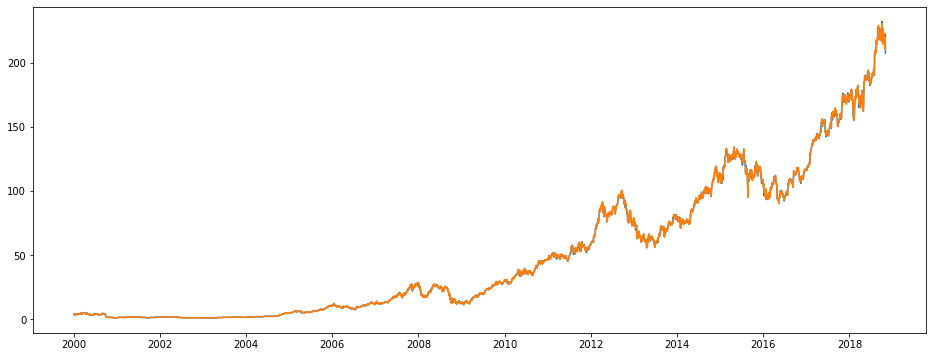

In [208]:
from IPython.core.pylabtools import figsize
df_graph = df_plot.select('date', 'close', 'open').orderBy('date').toPandas()
fig,ax = plt.subplots(figsize=(16,6))
ax.plot(df_graph['date'], df_graph['close'], label='close')
ax.plot(df_graph['date'], df_graph['open'], label='open')

In [211]:
df_graph.isnull().sum()

date     0
close    0
open     0
dtype: int64

In [212]:
df_pd = df_c.orderBy('date')
df_pd = df_pd.toPandas()
x2 = df_pd.iloc[:, [0, 1, 2, 4, 5, 6]]
x2['date'] = pd.to_datetime(x2['date'], format='%Y-%m-%d')
y2 = df_pd.iloc[:, [0, 3]]
y2['date'] = pd.to_datetime(y2['date'], format='%Y-%m-%d')
x2_train = x2.loc[x2['date'] <= '2017-12-31']
x2_train = x2_train.drop('date', axis=1)
y2_train = y2.loc[y2['date'] <= '2017-12-31']
x2_test = x2.loc[x2['date'] > '2017-12-31']
x2_test = x2_test.drop('date', axis=1)
y2_test = y2.loc[y2['date'] > '2017-12-31']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [213]:
# x_train.shape
# x_train.head(2)
# # y_train.shape
# # y_train.head()
# y_train.head()
# y2_test.head()
# x2_test.head()
# x2_train.head()
x2_test.head()
# x2.tail()
# y2_test.head()
# x2.head()

,volume,open,high,low,adjclose
4528,25555900,170.16000366210938,172.3000030517578,169.25999450683594,170.30422973632812
4529,29517900,172.52999877929688,174.5500030517578,171.9600067138672,170.27456665039062
4530,22434600,172.5399932861328,173.47000122070312,172.0800018310547,171.0655059814453
4531,23660000,173.44000244140625,175.3699951171875,173.0500030517578,173.01312255859375
4532,20567800,174.35000610351562,175.61000061035156,173.92999267578125,172.37051391601562


In [214]:
rf = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=20)

In [215]:
rf.fit(x2_train, y2_train['close'])

RandomForestRegressor(max_depth=20, n_estimators=500, random_state=42)

In [216]:
y_pred = rf.predict(x2_test)

In [217]:
df_compare = pd.DataFrame({
    'y2_test': y2_test['close'],
    'y_pred': y_pred
})
df_compare = df_compare.join(y2_test).drop('close', axis=1)

In [218]:
df_compare

,y2_test,y_pred,date
4528,172.25999450683594,172.072702,2018-01-02
4529,172.22999572753906,172.606023,2018-01-03
4530,173.02999877929688,172.883982,2018-01-04
4531,175.0,174.869699,2018-01-05
4532,174.35000610351562,174.621979,2018-01-08
...,...,...,...
4736,212.24000549316406,176.118661,2018-10-29
4737,213.3000030517578,176.126501,2018-10-30
4738,218.86000061035156,176.126501,2018-10-31
4739,222.22000122070312,176.118661,2018-11-01


In [219]:
mean_squared_error(y2_test['close'], y_pred)

626.1951618290153

In [220]:
# Model Evaluation
import sklearn.metrics as metrics
# Calculate the mean squared error between the actual ytest versus predicted stock
np.sqrt(metrics.mean_squared_error(y2_test['close'],y_pred))

25.02389182019886